In [1]:
import pandas as pd
frames = []
for i in range(1,17):
    frames.append(pd.read_csv(r'data\dataset%d.csv'%(i), error_bad_lines=False,sep=';'))
us_election = pd.concat(frames,ignore_index=True)

In [2]:
us_election.shape

(3113, 145)

In [3]:
us_election.head(10)

,ACFS,Adult.obesity,Adult.smoking,Adults.65.and.Older.Living.in.Poverty,African.American.Population,Amerindian,Asian,Asian.American.Population,At.Least.Bachelor.s.Degree,At.Least.High.School.Diploma,...,summer_TAVG,summer_TMAX,summer_TMIN,temp,temp_bins,votes,winter_PRCP,winter_TAVG,winter_TMAX,winter_TMIN
0,0.000044,0.300,0.183,6.85,23.55,0.55,2.35,2.35,37.4,87.8,...,773.000000,885.0,660.000000,15.333333,"14.9, 16.6",159473,1607.0,412.0,524.0,300.000000
1,0.000024,0.314,0.173,7.95,3.85,4.75,1.45,1.45,17.9,83.7,...,NaN,NaN,NaN,NaN,NaN,77387,NaN,NaN,NaN,NaN
2,0.000115,0.373,0.251,21.30,46.50,0.35,0.25,0.25,13.5,71.9,...,783.000000,903.0,663.000000,17.333333,"16.6, 18.5",10390,NaN,470.0,601.0,339.000000
3,0.000043,0.384,0.231,15.45,31.45,0.25,0.40,0.40,11.9,75.7,...,NaN,NaN,NaN,NaN,NaN,33218,NaN,NaN,NaN,NaN
4,0.000507,0.368,0.362,24.15,53.60,0.10,0.30,0.30,12.6,69.3,...,813.000000,918.0,708.000000,17.833333,"16.6, 18.5",4176,1662.5,454.0,561.0,347.500000
5,0.000185,0.311,0.140,12.60,1.70,1.00,1.00,1.00,13.3,71.6,...,907.166667,1056.5,758.166667,23.083333,"18.5, 25.2",40759,NaN,567.5,702.5,432.666667
6,0.000006,0.359,0.195,17.85,25.40,7.85,0.25,0.25,9.3,78.0,...,795.000000,918.0,672.000000,18.000000,"16.6, 18.5",8492,NaN,482.0,617.0,346.000000
7,0.000022,0.351,0.267,10.20,26.10,0.20,0.35,0.35,15.7,76.1,...,NaN,NaN,NaN,NaN,NaN,18504,NaN,NaN,NaN,NaN
8,0.000014,0.313,0.261,17.35,11.60,0.20,0.00,0.00,9.2,75.3,...,NaN,NaN,NaN,NaN,NaN,6931,1662.5,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,244746,NaN,NaN,NaN,NaN


In [4]:
location = input("State:")
votes_by_county_df = us_election[['ST','County','Clinton H','Trump D']]
county = []
vote_T = []
vote_H = []
name_T = []
name_H = []
sum_T = 0
sum_H = 0

for i in range(3113):
    if votes_by_county_df.ST[i] == location:
        county.append(votes_by_county_df['County'][i])
        vote_T.append(votes_by_county_df['Trump D'][i])
        vote_H.append(votes_by_county_df['Clinton H'][i])
        name_H.append('Clinton H')
        name_T.append('Trump D')
        sum_H += votes_by_county_df['Clinton H'][i]
        sum_T += votes_by_county_df['Trump D'][i]
df3 = pd.DataFrame({'County':county,'Name':name_T,'Vote':vote_T})
df4 = pd.DataFrame({'County':county,'Name':name_H,'Vote':vote_H})
mean_T = sum_T/len(county)
mean_H = sum_H/len(county)
result_df = pd.concat([df3,df4])

result_df

State:MA


,County,Name,Vote
0,BRISTOL,Trump D,104775
1,FRANKLIN,Trump D,10327
2,HAMPSHIRE,Trump D,22089
3,PLYMOUTH,Trump D,114722
4,WORCESTER,Trump D,157138
5,BERKSHIRE,Trump D,16799
6,MIDDLESEX,Trump D,216163
7,NORFOLK,Trump D,119171
8,HAMPDEN,Trump D,78230
9,NANTUCKET,Trump D,1892


Hillary has higher vote


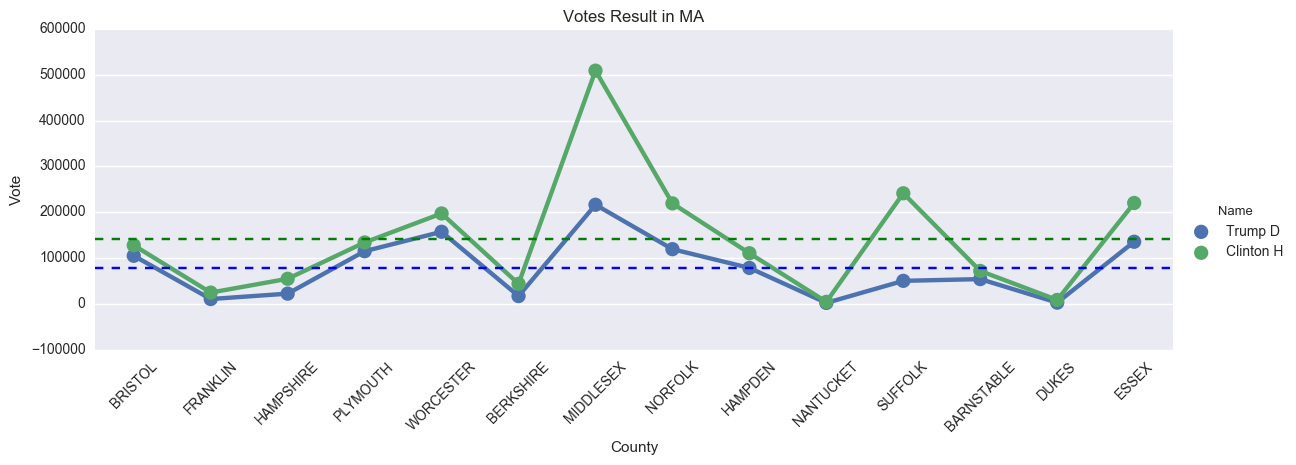

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
ax=sns.factorplot(x='County',y='Vote',data = result_df,hue="Name",aspect =3)
ax.set_xticklabels(rotation = 45)
plt.axhline(y=mean_T,color='b',ls='dashed')
plt.axhline(y=mean_H,color='g',ls='dashed')
if sum_T > sum_H:
    print("Trump has higher vote")
else:
    print("Hillary has higher vote")
plt.title('Votes Result in '+location)
plt.savefig("vote_result_by_county.png")

In [9]:
location

'MA'

In [6]:
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
import bokeh
#bokeh.sampledata.download()
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == location.lower()}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
vote_trump = vote_T
vote_hillary = vote_H
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=vote_trump,
    rate2=vote_hillary,
))

TOOLS = "reset,hover,save"

p = figure(
    title="Results in " +location, tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Vote Trump", "@rate"),
    ("Vote Hillary", "@rate2"),
    ("(Long, Lat)", "($x, $y)"),
]

output_notebook()
show(p,notebook_handle=True)

Loading BokehJS ...